In [2]:
#!pip install concrete-ml

# Instagram Influence Analyser


In [3]:
try:
    import concrete.ml
except:
    import subprocess
    import IPython
    subprocess.check_output("pip install concrete-ml>=0.5.1", shell=True)
    IPython.Application.instance().kernel.do_shutdown(True) #automatically restarts kernel

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras-nlp 0.9.3 requires keras-core, which is not installed.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
sqlalchemy 2.0.25 requires typing-extensions>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
aiobotocore 2.12.3 requires botocore<1.34.70,>=1.34.41, but you have botocore 1.29.165 which is incompatible.
albumentations 1.4.0 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 15.0.2 which is incompatible.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
conda 24.3.0 requires packaging>=23.0, but you have packaging 21.3 which is incompat

## Test Data Encryption and Visualization

In [1]:
from concrete.ml.pandas import ClientEngine
from io import StringIO
import pandas

data_left = """index,Instagram_Name,followers,country,Eng.Auth
1,12.54,2.5,Male,No
2,11.17,1.5,Female,No
3,20.29,2.75,Female,No
"""

# Load your pandas DataFrame
df = pandas.read_csv(StringIO(data_left))

# Obtain client object
client = ClientEngine(keys_path="my_keys")

# Encrypt the DataFrame
df_encrypted = client.encrypt_from_pandas(df)

print(df_encrypted)

# Decrypt the DataFrame to produce a pandas DataFrame
df_decrypted = client.decrypt_to_pandas(df_encrypted)

ModuleNotFoundError: No module named 'concrete'

### Importing library and Data Preprocessing

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 

In [5]:
df = pd.read_csv("/kaggle/input/top-1000-social-media-channels/social media influencers-INSTAGRAM - -DEC 2022.csv")
df

,Rank,name,instagram name,Category_1,Category_2,followers,country,Eng. (Auth.),Eng. (Avg.)
0,1,leomessi,Leo Messi,Sports with a ball,Family,409.8M,Argentina,17.8M,23.4M
1,2,cristiano,Cristiano Ronaldo,Sports with a ball,NaN,523M,India,11.7M,14.7M
2,3,neymarjr,NJ 🇧🇷,Sports with a ball,NaN,198.9M,Brazil,6.7M,9.5M
3,4,kyliejenner,Kylie 🤍,Fashion,Modeling,376.3M,United States,2.7M,4.3M
4,5,kendalljenner,Kendall,Modeling,Fashion,268M,United States,3.2M,5M
...,...,...,...,...,...,...,...,...,...
995,996,thiago6,Thiago Alcantara,Sports with a ball,NaN,10.4M,United Kingdom,129.9K,222.7K
996,997,soycintiacossio,Cintia Cossio,Modeling,Adult content,6M,Colombia,313.4K,390.6K
997,998,feat.dino,이찬,Lifestyle,NaN,2.7M,South Korea,716.6K,876.4K
998,999,djokernole,Novak Djokovic,Sports with a ball,NaN,11.8M,United States,158.6K,197.5K


In [6]:
df["Followers"]=df["followers"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
df["Engagement Avg"]=df["Eng. (Avg.)"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
df.drop(['followers','Eng. (Avg.)','Category_2','Eng. (Auth.)','instagram name','Rank'],axis=1,inplace=True)

In [7]:
df =df.rename(columns = {'Category_1':'Category','name':'Name','country':'Country'})
df

,Name,Category,Country,Followers,Engagement Avg
0,leomessi,Sports with a ball,Argentina,409800000,23400000
1,cristiano,Sports with a ball,India,523000000,14700000
2,neymarjr,Sports with a ball,Brazil,198900000,9500000
3,kyliejenner,Fashion,United States,376300000,4300000
4,kendalljenner,Modeling,United States,268000000,5000000
...,...,...,...,...,...
995,thiago6,Sports with a ball,United Kingdom,10400000,222700
996,soycintiacossio,Modeling,Colombia,6000000,390600
997,feat.dino,Lifestyle,South Korea,2700000,876400
998,djokernole,Sports with a ball,United States,11800000,197500


In [8]:
df.isnull().sum()
df=df.fillna('None')
df['Engagement Rate']=np.round((df['Engagement Avg']/df['Followers'])*100,3)

In [9]:
Target = []
for value in df["Engagement Rate"]:
    if value < 3.5:
        Target.append(0)
    else:
        Target.append(1)
      
    
    
df["Target"] = Target  
df

,Name,Category,Country,Followers,Engagement Avg,Engagement Rate,Target
0,leomessi,Sports with a ball,Argentina,409800000,23400000,5.710,1
1,cristiano,Sports with a ball,India,523000000,14700000,2.811,0
2,neymarjr,Sports with a ball,Brazil,198900000,9500000,4.776,1
3,kyliejenner,Fashion,United States,376300000,4300000,1.143,0
4,kendalljenner,Modeling,United States,268000000,5000000,1.866,0
...,...,...,...,...,...,...,...
995,thiago6,Sports with a ball,United Kingdom,10400000,222700,2.141,0
996,soycintiacossio,Modeling,Colombia,6000000,390600,6.510,1
997,feat.dino,Lifestyle,South Korea,2700000,876400,32.459,1
998,djokernole,Sports with a ball,United States,11800000,197500,1.674,0


### Splitting of dataset into training and testing

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = df.drop(['Target','Name','Category','Country',], axis=1)
y = df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Machine Learning Model Implementation with FHE Encryption

In [11]:
from concrete.ml.sklearn import LogisticRegression as LogisticRegression_fhe
from concrete.ml.sklearn.svm import LinearSVC as LinearSVC_fhe
from concrete.ml.sklearn.tree import DecisionTreeClassifier as DecisionTreeClassifier_fhe
from concrete.ml.sklearn.rf import RandomForestClassifier as RandomForestClassifier_fhe

model_pipeline = []
model_pipeline.append(LogisticRegression_fhe(solver='liblinear'))
model_pipeline.append(LinearSVC_fhe())
model_pipeline.append(DecisionTreeClassifier_fhe())
model_pipeline.append(RandomForestClassifier_fhe())

In [12]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_list =['Logistic Regression','SVM','Decision Tree','random Forest']
acc_list = []
cm_list = []
c_report = []
for model in model_pipeline:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test,y_pred))
    cm_list.append(confusion_matrix(y_test,y_pred))
    c_report.append(classification_report(y_test,y_pred))
    
c_report

['              precision    recall  f1-score   support\n\n           0       0.59      0.97      0.73       102\n           1       0.91      0.30      0.45        98\n\n    accuracy                           0.64       200\n   macro avg       0.75      0.63      0.59       200\nweighted avg       0.74      0.64      0.59       200\n',
 '              precision    recall  f1-score   support\n\n           0       0.59      0.97      0.73       102\n           1       0.91      0.30      0.45        98\n\n    accuracy                           0.64       200\n   macro avg       0.75      0.63      0.59       200\nweighted avg       0.74      0.64      0.59       200\n',
 '              precision    recall  f1-score   support\n\n           0       0.99      0.98      0.99       102\n           1       0.98      0.99      0.98        98\n\n    accuracy                           0.98       200\n   macro avg       0.98      0.99      0.98       200\nweighted avg       0.99      0.98      0.

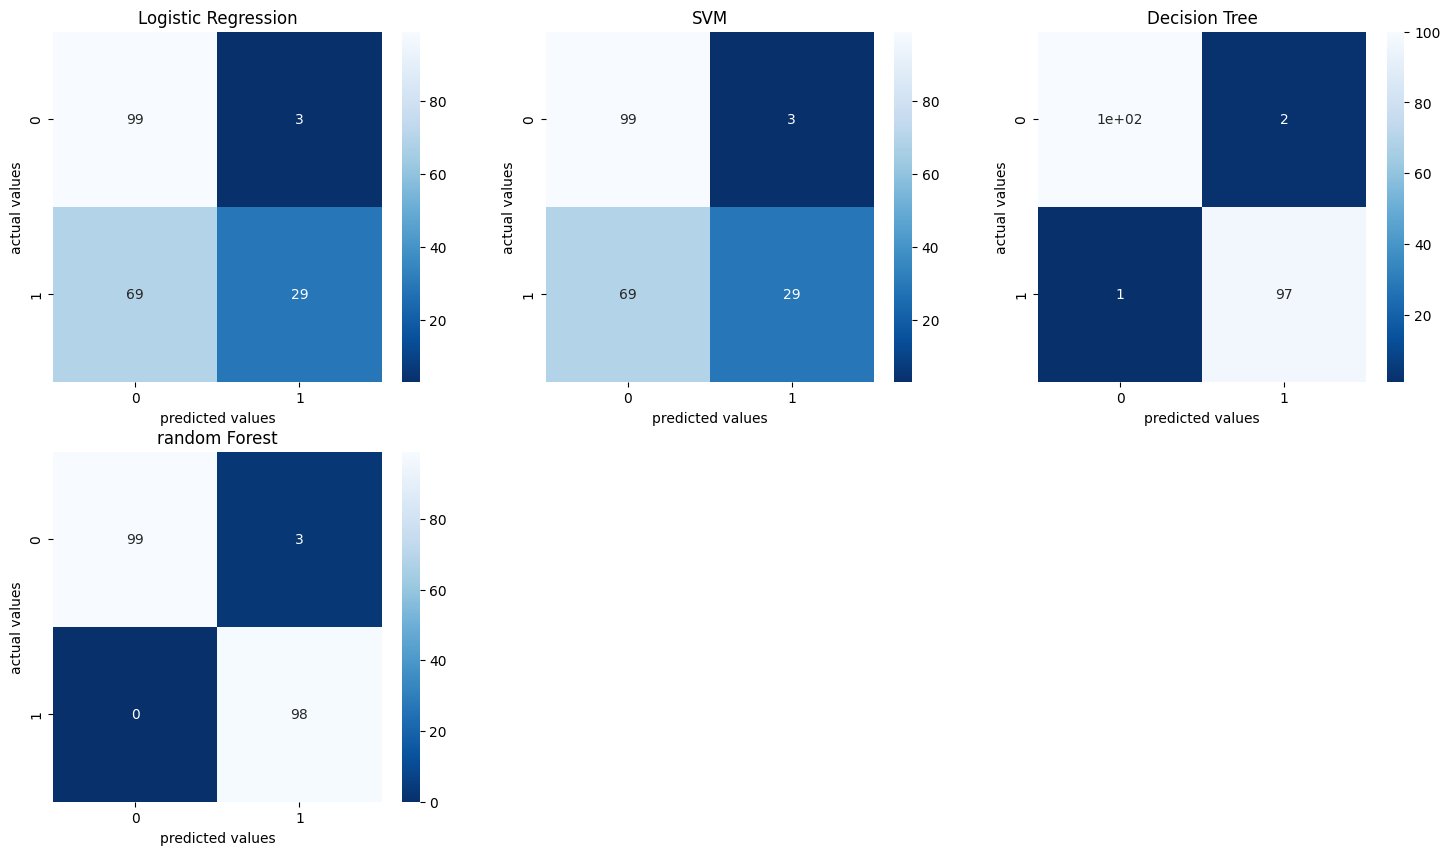

In [13]:
fig = plt.figure(figsize=(18,10))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2,3,i+1).set_title(model)
    cm_plot = sns.heatmap(cm,annot=True,cmap="Blues_r")
    cm_plot.set_xlabel('predicted values')
    cm_plot.set_ylabel('actual values')

In [14]:
result_df_she = pd.DataFrame({'Model':model_list,'Accuracy':acc_list})
result_df_she

,Model,Accuracy
0,Logistic Regression,0.640
1,SVM,0.640
2,Decision Tree,0.985
3,random Forest,0.985


### Machine Learning Model Implementation without FHE Encryption



In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model_pipeline = []
model_pipeline.append(LogisticRegression(solver='liblinear'))
model_pipeline.append(SVC())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())

In [16]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_list =['Logistic Regression','SVM','Decision Tree','random Forest']
acc_list = []
cm_list = []
c_report = []
for model in model_pipeline:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test,y_pred))
    cm_list.append(confusion_matrix(y_test,y_pred))
    c_report.append(classification_report(y_test,y_pred))
    
c_report

['              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       102\n           1       1.00      1.00      1.00        98\n\n    accuracy                           1.00       200\n   macro avg       1.00      1.00      1.00       200\nweighted avg       1.00      1.00      1.00       200\n',
 '              precision    recall  f1-score   support\n\n           0       0.80      0.75      0.78       102\n           1       0.76      0.81      0.78        98\n\n    accuracy                           0.78       200\n   macro avg       0.78      0.78      0.78       200\nweighted avg       0.78      0.78      0.78       200\n',
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       102\n           1       1.00      1.00      1.00        98\n\n    accuracy                           1.00       200\n   macro avg       1.00      1.00      1.00       200\nweighted avg       1.00      1.00      1.

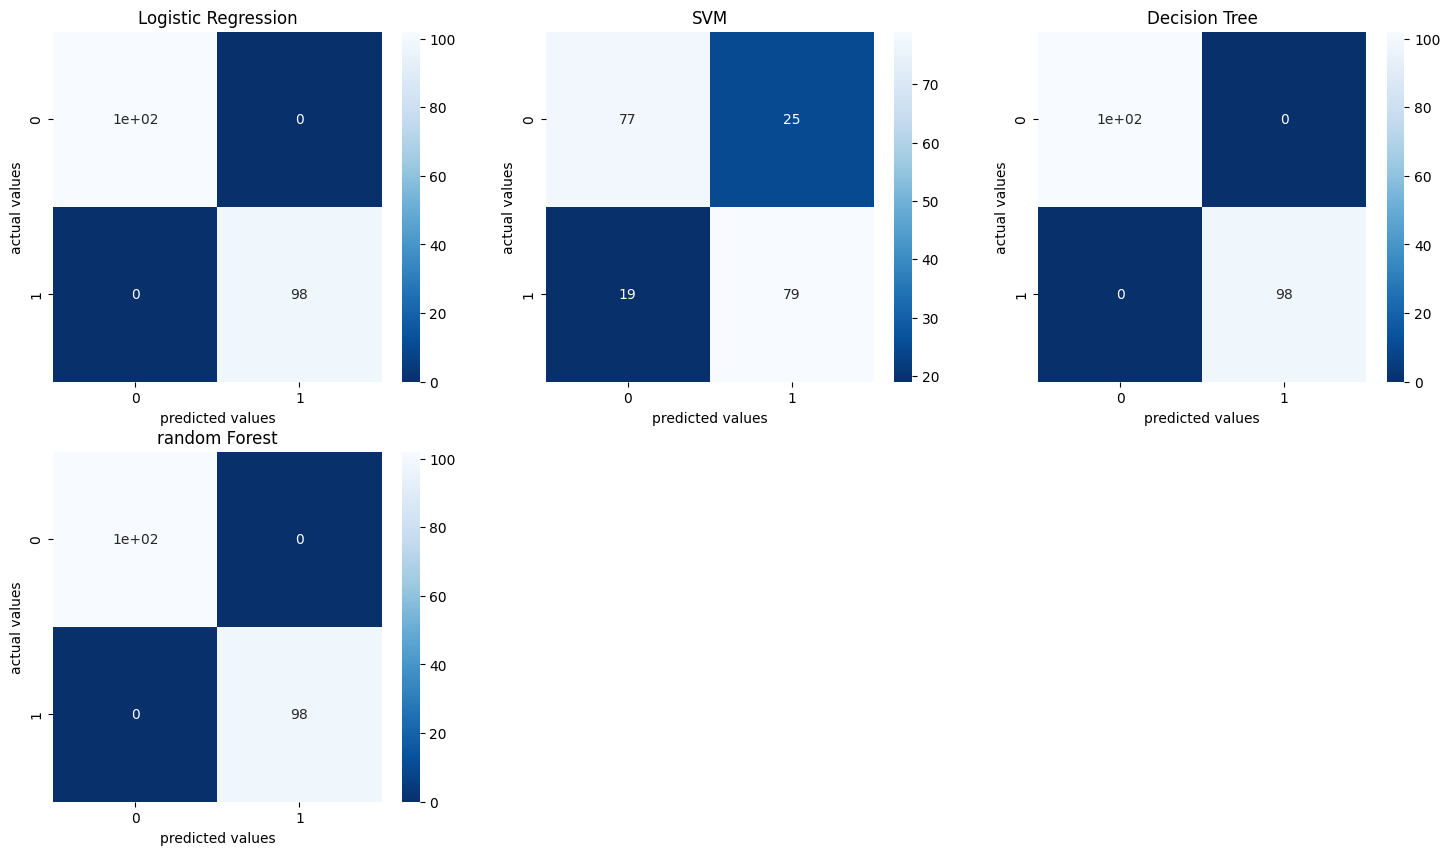

In [17]:
fig = plt.figure(figsize=(18,10))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2,3,i+1).set_title(model)
    cm_plot = sns.heatmap(cm,annot=True,cmap="Blues_r")
    cm_plot.set_xlabel('predicted values')
    cm_plot.set_ylabel('actual values')

In [18]:
result_df = pd.DataFrame({'Model':model_list,'Accuracy':acc_list})
result_df

,Model,Accuracy
0,Logistic Regression,1.00
1,SVM,0.78
2,Decision Tree,1.00
3,random Forest,1.00


# Comparision of Accuracies 

In [19]:
#With FHE 
result_df_she

,Model,Accuracy
0,Logistic Regression,0.640
1,SVM,0.640
2,Decision Tree,0.985
3,random Forest,0.985


In [20]:
#Without FHE
result_df

,Model,Accuracy
0,Logistic Regression,1.00
1,SVM,0.78
2,Decision Tree,1.00
3,random Forest,1.00
